# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Group Project: Predicting Solar Power Generation with Weather Forecasting

### Corina Lentz, Joseph Hicks, and Garrett Hart

In [1]:
# This was for running the notebook in Colab
# from google.colab import drive
# drive.mount('/content/drive')

## Notebook 3: Modeling and Conclusions
---

For the modeling portion of this project, we will be trying out a variety of different regression models, inlcuding a **Random Forest Regressor**, a **Linear Regression model**, **SVM regression model**, and a **Bagging Regressor model**.

### Modeling Setup

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read in the data
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,date,generated_kWh,maxtempF,mintempF,avgtempF,totalSnow_cm,sunHour,uvIndex,humidity,precipInches,pressureInches,cloudcover,windspeedMiles,visibilityMiles,lag_1,lag_2
0,2011-10-29,9.4,63,50,58,0.0,6.6,3,79,0.0,31,72,9,6,10.0,10.1
1,2011-10-30,4.6,60,51,56,0.0,8.3,3,76,0.0,31,36,5,6,9.4,10.0
2,2011-10-31,3.8,60,49,55,0.0,9.9,3,69,0.0,31,6,6,6,4.6,9.4
3,2011-11-01,8.6,60,49,56,0.0,9.8,4,76,0.0,30,44,7,6,3.8,4.6
4,2011-11-02,5.0,58,47,53,0.0,9.8,3,77,0.0,30,30,7,6,8.6,3.8


In [3]:
# Create a random seed for reproducibility
np.random.seed(123)

# Reset index to date
df.set_index('date', inplace=True)

# Create X and y
X = df.drop(columns='generated_kWh') # Drop cumulative power too - it is redundant
y = df['generated_kWh']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [4]:
# Create baseline metrics to compare all future models to
baseline_train_preds = [y_train.mean()]*len(y_train)
baseline_test_preds = [y_test.mean()]*len(y_test)

print(f'Baseline RMSE: {mean_squared_error(y_test, baseline_test_preds, squared=False)}')
print(f'Baseline R Squared: {r2_score(y_test, baseline_test_preds)}')

Baseline RMSE: 8.43949854332282
Baseline R Squared: 0.0


### Random Forest Regression

We started out by building a Random Forest model since they are typically strong predictive models that don’t require much data pre-processing like scaling or normalization.

In [2]:
# Imports
from sklearn.ensemble import RandomForestRegressor

In [7]:
count = 0
model_params = {}

In [33]:
# Set up some modeling scaffolding

model_params = model_params
count = count

rf = RandomForestRegressor(random_state=33, n_jobs=6)

# Parameters to feed the grid search

params = {'n_estimators':      [85, 90, 95],
          'max_features':      [None, 'sqrt', 'log2'],
          'max_depth':         [5, 6, 7],
          'min_samples_split': [6, 7, 8],
          'ccp_alpha':         [0.001, 0.0012, 0.0015]
}

gs = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=6)

gs.fit(X_train, y_train)

count += 1

gs.best_params_['score'] = gs.best_score_
print(gs.best_score_)
model_params[f'model_{count}'] = gs.best_params_
model_params

0.6876875901609952


{'model_1': {'ccp_alpha': 0.001,
  'max_depth': 5,
  'max_features': None,
  'min_samples_split': 6,
  'n_estimators': 100,
  'score': 0.6346781180457373},
 'model_2': {'ccp_alpha': 0.0012,
  'max_depth': 6,
  'max_features': None,
  'min_samples_split': 7,
  'n_estimators': 110,
  'score': 0.6413412073922313},
 'model_3': {'ccp_alpha': 0.0012,
  'max_depth': 6,
  'max_features': None,
  'min_samples_split': 7,
  'n_estimators': 90,
  'score': 0.6854458031537242},
 'model_4': {'ccp_alpha': 0.0015,
  'max_depth': 7,
  'max_features': 'sqrt',
  'min_samples_split': 6,
  'n_estimators': 95,
  'score': 0.6876875901609952}}

The first two models were trained without the lag_1 and lag_2 features.

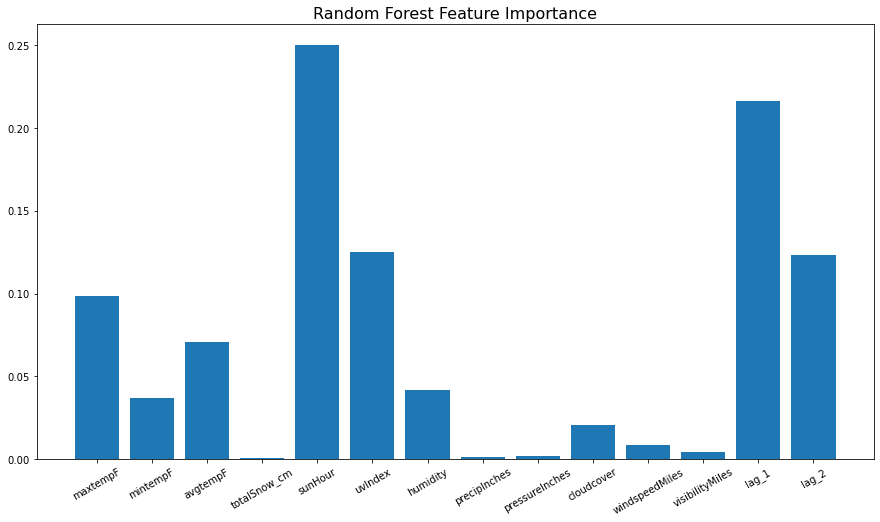

In [36]:
# Create a feature importance plot with the best estimator (idea from https://machinelearningmastery.com/calculate-feature-importance-with-python/)
importance = gs.best_estimator_.feature_importances_

plt.figure(figsize=(15,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(14), labels=list(X.columns), rotation=30)
plt.title('Random Forest Feature Importance', {'fontsize':16})
plt.show()

In [40]:
gs.best_params_['training_score'] = gs.score(X_train, y_train)
gs.best_params_['test_score'] = gs.score(X_test, y_test)

In [41]:
gs.best_params_

{'ccp_alpha': 0.0015,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 95,
 'score': 0.6876875901609952,
 'training_score': 0.7828791451902017,
 'test_score': 0.7085388789309537}

In [37]:
train_preds = gs.best_estimator_.predict(X_train)
print(f'Training RMSE was {mean_squared_error(y_train, train_preds, squared=False)}')
test_preds = gs.best_estimator_.predict(X_test)
print(f'Testing RMSE was {mean_squared_error(y_test, test_preds, squared=False)}')

RMSE was 3.8306119218704304
RMSE was 4.5562438355030395


### Linear Regression

This model will mostly be used as an inferential model, and as a starting place for more complex models:

In [6]:
# Imports
from sklearn.linear_model import LinearRegression

In [7]:
# Fit the model
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Generate scores and metrics
print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')

lr_preds = lr.predict(X_test)
print(f'RMSE was {mean_squared_error(y_test, lr_preds, squared=False)}')

Training Score: 0.7192593383418606
Testing Score: 0.7044047276597041
RMSE was 4.588443458701929


This represents a nice improvement over the baseline model, but can probably be improved upon.

To get the coefficients from the model in a nice format:

In [9]:
pd.DataFrame({
    'feature': X.columns,
    'coef'   : lr.coef_
})

,feature,coef
0,maxtempF,-0.146836
1,mintempF,-0.489950
2,avgtempF,0.551573
3,totalSnow_cm,-0.073959
4,sunHour,0.424606
5,uvIndex,1.284921
6,humidity,-0.043630
7,precipInches,1.177796
8,pressureInches,0.173102
9,cloudcover,0.016153


The fact that the `uvIndex` feature has the largest coefficient is not suprising, as we are talking about solar panels here. Same with `precipInches` - it makes sense that a day with precipitation will mean lower output in general.

### SVR Modeling

One of the best ways to create a more powerful predictive model (outside of using a neural net, which would not be advisable on such a small dataset) is to utilize Support Vector Machines. A regressor SVM can be found in `scikitlearn`:

In [10]:
# Imports
from sklearn.svm import SVR

In [11]:
# Setting up metrics and parameter storage
model_params_svr = {}
count_svr = 0

In [18]:
# Set up a pipeline and gridsearch over it - first reset count and model params dict
model_params_svr = model_params_svr
count_svr = count_svr

pipe_svr = Pipeline([
    ('sc', StandardScaler()),
    ('svr', SVR())
])

params_svr = {
    # 'sc__with_mean' : [True, False],
    # 'sc__with_std'  : [True, False],
    'svr__kernel'   : ['poly', 'rbf'],
    'svr__degree'   : [1, 3, 5],
    'svr__C'        : [25, 30, 35, 40, 100],
    'svr__gamma'    : ['scale', 'auto']
}

grid_svr = GridSearchCV(pipe_svr, param_grid=params_svr, 
                     n_jobs=-1, cv=3, verbose=1)

grid_svr.fit(X_train, y_train)

# Return the params used and their associated scores - code taken from Joseph's Project 3
count_svr += 1

grid_svr.best_params_['training_score'] = grid_svr.best_score_
model_params_svr[f'model_{count_svr}'] = grid_svr.best_params_
grid_svr.best_params_['test_score'] = grid_svr.score(X_test, y_test)

model_df_svr = pd.DataFrame.from_dict(model_params_svr, orient='index')

model_df_svr

Fitting 3 folds for each of 60 candidates, totalling 180 fits


,svr__C,svr__degree,svr__gamma,svr__kernel,training_score,test_score
model_1,100,1,scale,poly,0.708363,0.70846


In [19]:
# Find the RMSE
preds_svr = grid_svr.predict(X_test)
mean_squared_error(y_test, preds_svr, squared=False)

4.556860817055959

SVR is struggling to get a score over 0.71 on the testing set, no matter the hyperparameters. For this reason, let's instead try a different model.

### Bagging Regressor

To try and get around the issues with the SVR model, let's try a model that utilizes bagging to aggregate the decisions of many models over different random sets of the data. This model can make use of SVR as a base model.

In [13]:
# Imports
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [14]:
# Setting up metrics and parameter storage
model_params_bt = {}
count_bt = 0

In [15]:
# Scale the data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [16]:
# Gridsearch
model_params_bt = model_params_bt
count_bt = count_bt

br = BaggingRegressor(base_estimator=DecisionTreeRegressor())

params_bt = {
    'base_estimator__max_depth'        : [10, 20, 25, 50, 75],
    'base_estimator__min_samples_split': [4, 6, 10, 15],
    'base_estimator__min_samples_leaf' : [2, 4, 8],
    'n_estimators'                     : [100, 200, 1000],
    'max_samples'                      : [0.05, 0.2]
}

grid_bt = GridSearchCV(br, param_grid=params_bt, n_jobs=-1,
                      verbose=1, cv=2)

grid_bt.fit(Z_train, y_train)

# Return the params used and their associated scores 
count_bt += 1

grid_bt.best_params_['training_score'] = grid_bt.best_score_
model_params_bt[f'model_{count_bt}'] = grid_bt.best_params_
grid_bt.best_params_['test_score'] = grid_bt.score(Z_test, y_test)

model_df_bt = pd.DataFrame.from_dict(model_params_bt, orient='index')

model_df_bt

Fitting 2 folds for each of 360 candidates, totalling 720 fits


,base_estimator__max_depth,base_estimator__min_samples_leaf,base_estimator__min_samples_split,max_samples,n_estimators,training_score,test_score
model_1,50,2,4,0.2,200,0.702522,0.728071


This model is still not seeing a lot of improvement over the SVR or even the linear regression model. This indicates that the best way to improve the score here would be to go back and perform some more feature engineering (i.e. include more lag terms).